In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('finalData/EDA_data.csv')

In [3]:
data.columns

Index(['MP', 'games_starts', 'minutes', 'goals', 'assists', 'goals_pens',
       'pens_made', 'pens_att', 'cards_yellow', 'cards_red',
       'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'crosses',
       'interceptions', 'tackles_won', 'pens_won', 'pens_conceded',
       'main_info', 'country', 'name', 'month', 'year', 'position', 'height',
       'weight'],
      dtype='object')

##  Data Description 
#### Crossing: a cross is a medium- to-long-range pass from a wide area of the field towards the centre of the field near the opponent's goal.
#### Intercepting: An interception or intercept is a move in football that happens when a player on the defensive team catches a ball from the quarterback instead of the intended receiver.
#### penalities (goals_pens): in which a player is allowed to take a single shot at the goal while it is defended only by the opposing team's goalkeeper
#### tackle: to seize and throw down or stop (an opposing player with the ball) in football
#### foul: A foul is an unfair act by a player, deemed by the referee to contravene the game's laws, that interferes with the active play of the game.
#### foul drawn (fouled): In situations like these players often draw a foul, which means they encouraged the other player to foul them by perhaps making contact with their opponent and falling over, hoping the referee sees this as a foul.
#### offside: In soccer, offsides means that, from the team that is in possession of the ball, there is a player (from said team) that is standing between the last defender 

### Q1: does height matter in specific position ?

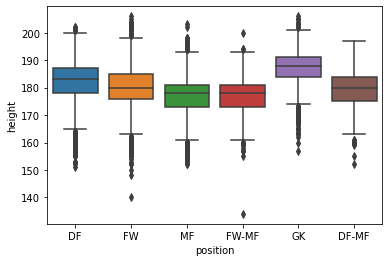

In [20]:
sns.boxplot(data=data,x='position',y='height')
plt.savefig('height.png')

#### as we can see goal keeper is the heighest and the height of midfielder does not matter as much 

### Q2: which position requires assisting skill the most ?

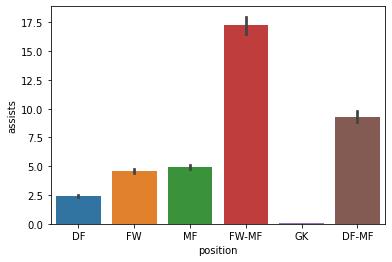

In [21]:
sns.barplot(data=data,x='position',y='assists')
plt.savefig('assist.png')

#### forward midfielders is the most one who makes assists in the game but this skill must be in the forward player too

### Q3: which position requires the crossing skill the most ?

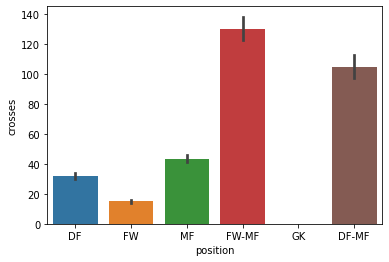

In [22]:
sns.barplot(data=data,x='position',y='crosses')
plt.savefig('crosses.png')

#### forward midefielder

### Q4: which position requires the Intercepting skill the most ?

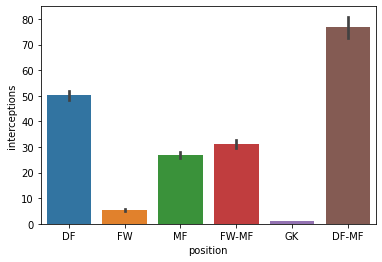

In [29]:
sns.barplot(data=data,x='position',y='interceptions')
plt.savefig('intercept.png')

#### defender midfielder 

### Q5: which position requires the Tackling skill the most ?


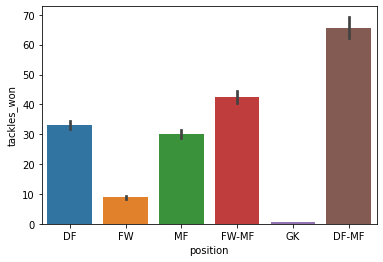

In [30]:
sns.barplot(data=data,x='position',y='tackles_won')
plt.savefig('tackle.png')

#### midfielder  needs this skill 

### Q6: which position makes the biggest number of mistakes? (impulse)

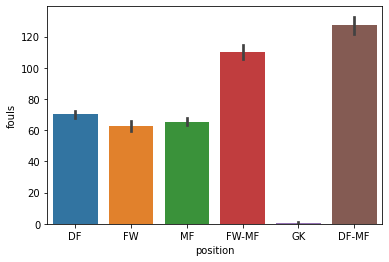

In [32]:
sns.barplot(data=data,x='position',y='fouls')
plt.savefig('fouls.png')

#### midfielder

### Q7: does mistakes related to the lack of experience (few number of matches) 

<AxesSubplot:xlabel='MP', ylabel='fouls'>

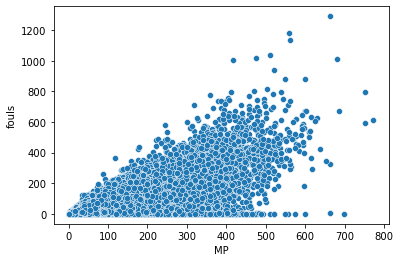

In [10]:
sns.scatterplot(data=data,x='MP',y='fouls')

#### no relation

### Q8: does personality related to making mistakes ?

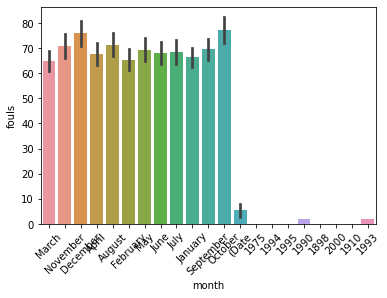

In [11]:
sns.barplot(data=data,x='month',y='fouls')
plt.xticks(rotation = 45)
plt.show()

#### they are almost the same 

### Q9: does position related to taking a card (yellow/red) and aggresiveness?

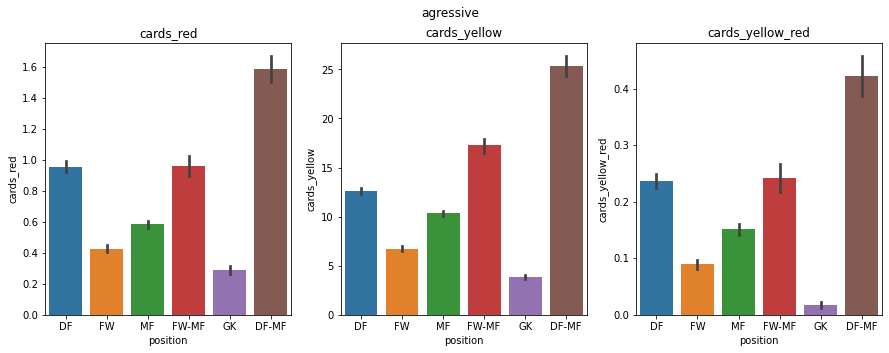

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('agressive')

# Bulbasaur
sns.barplot(ax=axes[0], x=data.position, y=data.cards_red)
axes[0].set_title('cards_red')

sns.barplot(ax=axes[1], x=data.position, y=data.cards_yellow)
axes[1].set_title('cards_yellow')

sns.barplot(ax=axes[2], x=data.position, y=data.cards_yellow_red)
axes[2].set_title('cards_yellow_red')
plt.savefig('acc.png')

#### midfielder is the most aggresive in the field 

### Q11: which position makes drawn foules ?

<AxesSubplot:xlabel='fouled', ylabel='position'>

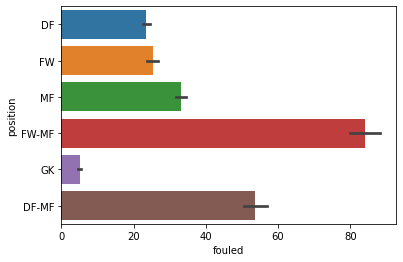

In [13]:
sns.barplot(data=data,y='position',x='fouled')

#### forward midfeilder

### top countries that support football game

In [40]:
countries=data['country'].value_counts().index[0:15]
countries

Index(['England ', 'Brazil ', 'Argentina ', 'Netherlands ', 'Colombia ',
       'Norway ', 'Denmark ', 'Croatia ', 'Bulgaria ', 'Austria ',
       'Czech Republic ', 'Australia ', 'Ecuador ', 'Belgium ', 'Nigeria '],
      dtype='object')

### Q12: which skill that each country develops the most

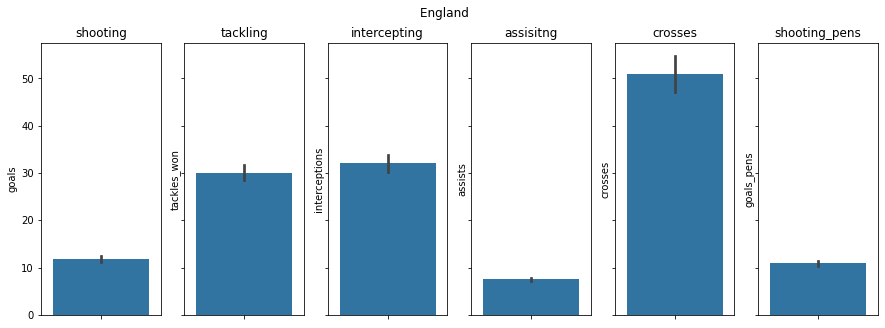

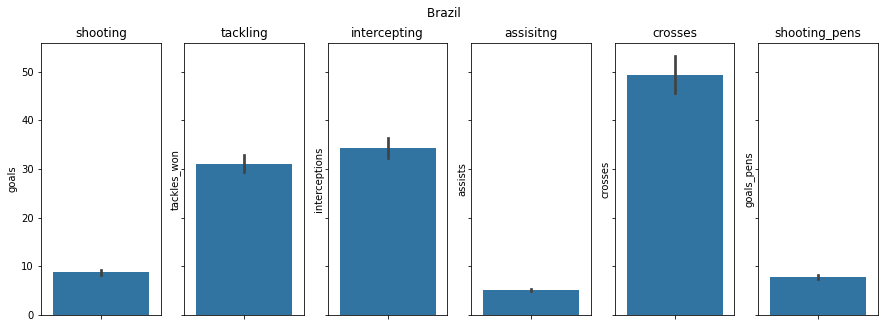

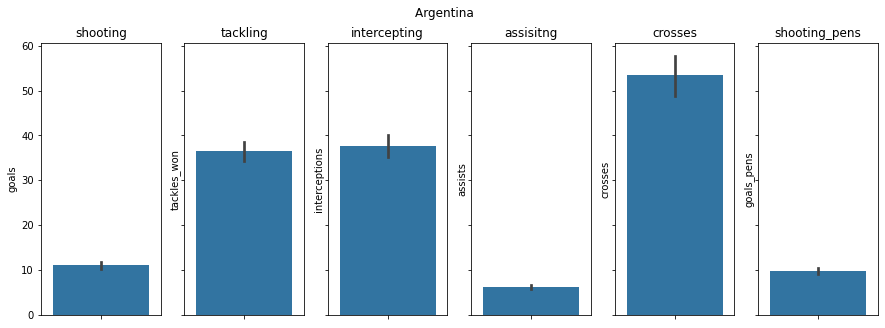

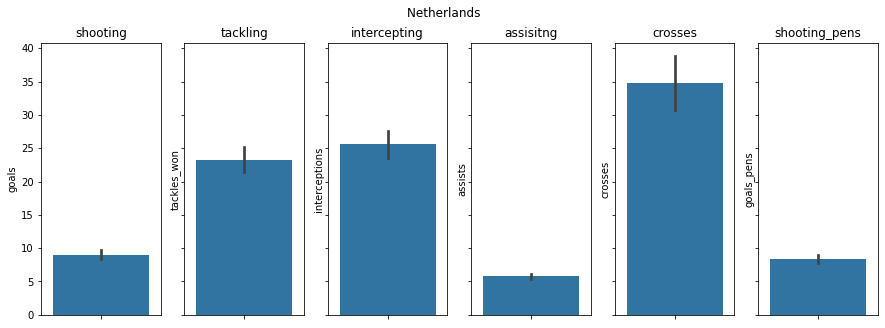

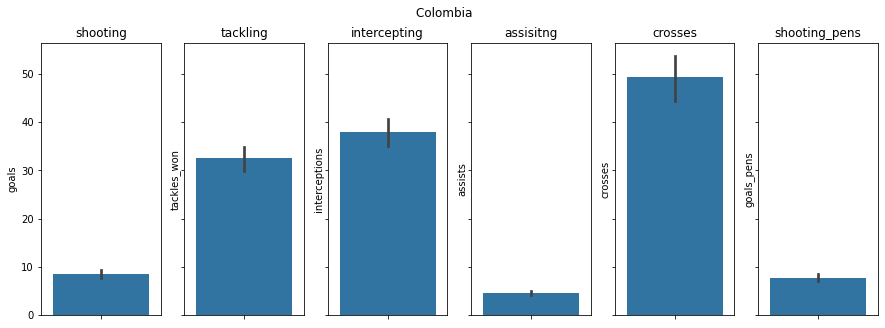

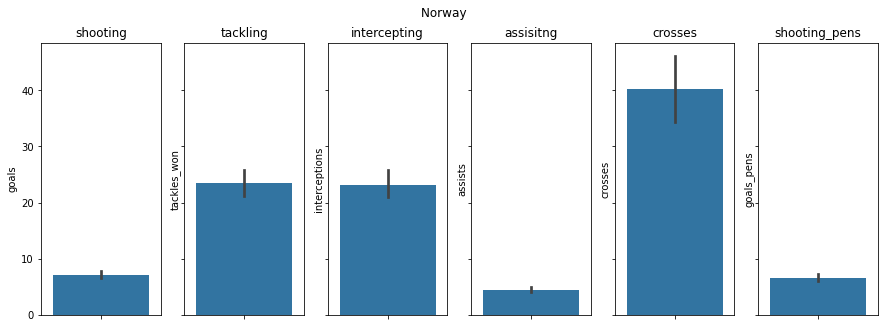

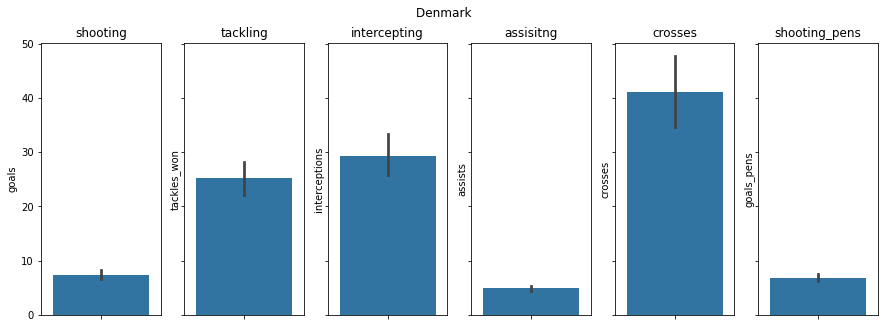

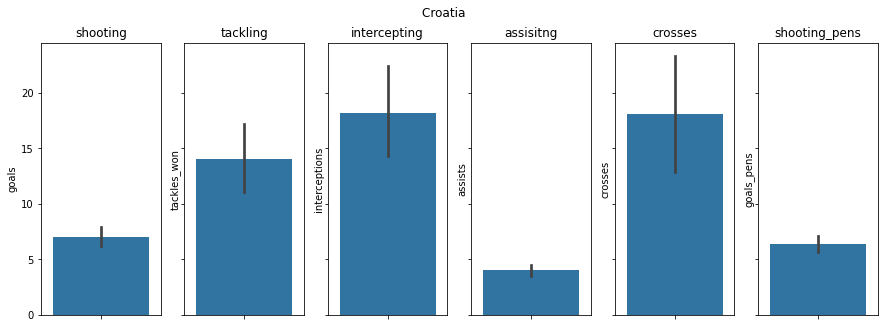

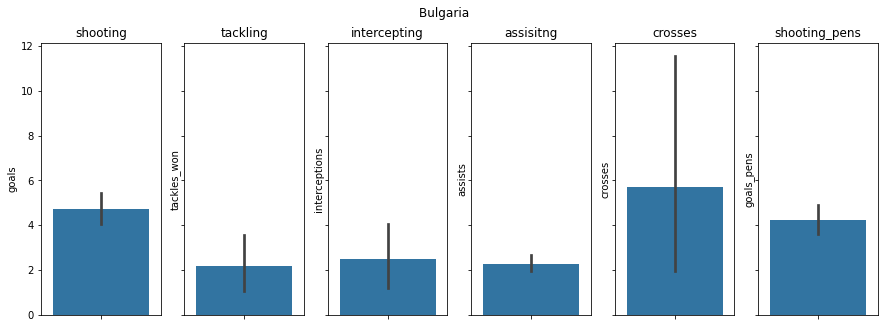

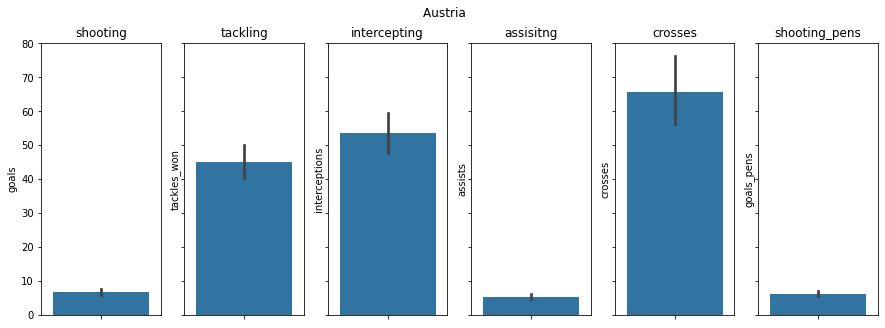

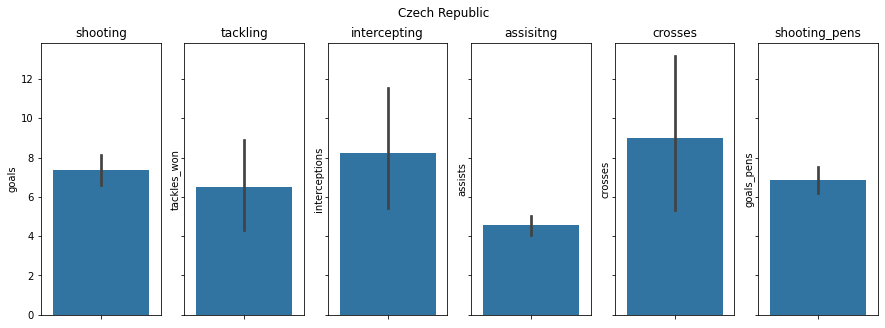

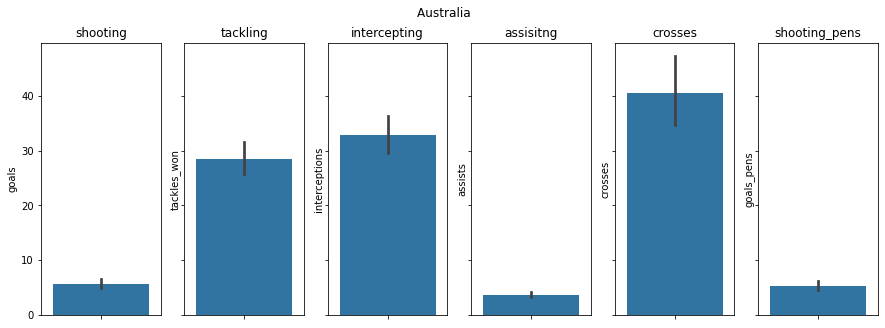

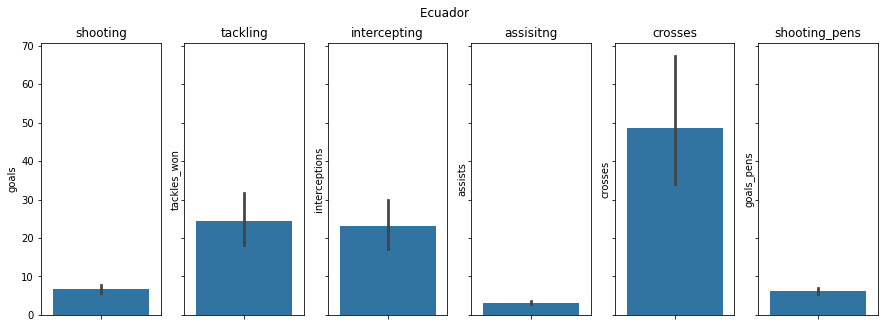

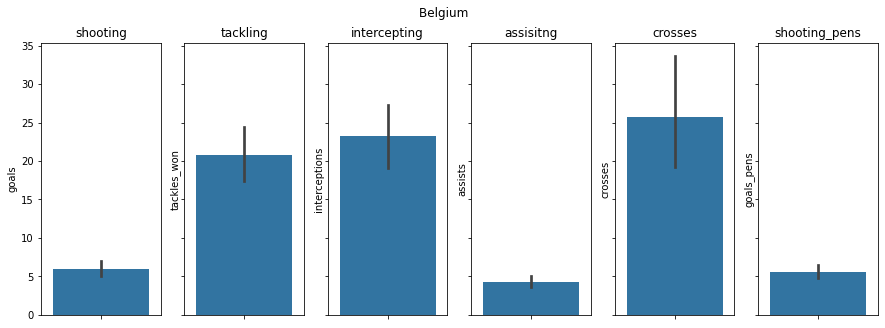

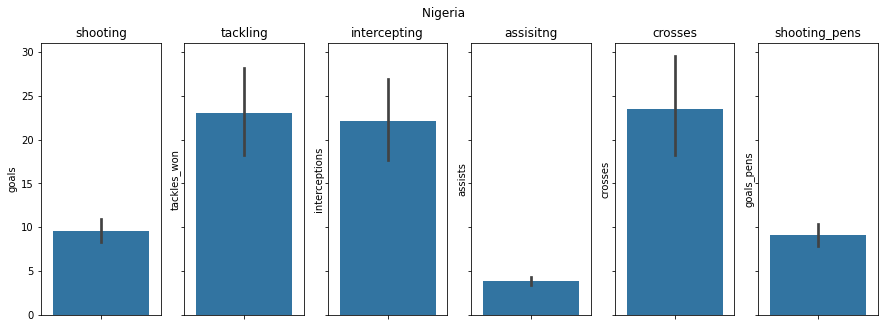

In [41]:
for country in countries:
    fig, axes = plt.subplots(1, 6, figsize=(15, 5),sharey=True)
    fig.suptitle(country)


    sns.barplot(ax=axes[0], y=data[data['country'] == country].goals)
    axes[0].set_title('shooting')

    sns.barplot(ax=axes[1], y=data[data['country'] ==  country ].tackles_won)
    axes[1].set_title('tackling')

    sns.barplot(ax=axes[2], y=data[data['country'] == country ].interceptions)
    axes[2].set_title('intercepting')

    sns.barplot(ax=axes[3], y=data[data['country'] == country ].assists)
    axes[3].set_title('assisitng')


    sns.barplot(ax=axes[4], y=data[data['country'] == country ].crosses)
    axes[4].set_title('crosses')
    
    sns.barplot(ax=axes[5], y=data[data['country'] == country].goals_pens)
    axes[5].set_title('shooting_pens')
    
    plt.savefig(f'{country}.png')


#### most  countries develop crosses, intercepting, tackling (defender midfielder skills)
#### Czeh develops all skills 

### Q14:  for each generation .. which skill that shines the most 

In [50]:
import numpy as np

In [51]:
def messy_data(x):
    try:
        x=int(x)
    except:
        return np.nan
    return int(x)

In [52]:
data['year']=data['year'].apply(messy_data)

In [53]:
data=data[~data['year'].isna()]

In [54]:
data['year']=data['year'].astype(int)

In [55]:
def classify_year(x):
    if x<1970:
        return '60s'
    if x>=1970 and x<1980:
        return '70s'
    if x>=1980 and x<1990:
        return '80s'
    if x>=1990 and x<2000:
        return '90s'
    else:
        return '2000s'

In [60]:
data['century']=data['year'].apply(classify_year)

In [63]:
years=data['century'].value_counts().index

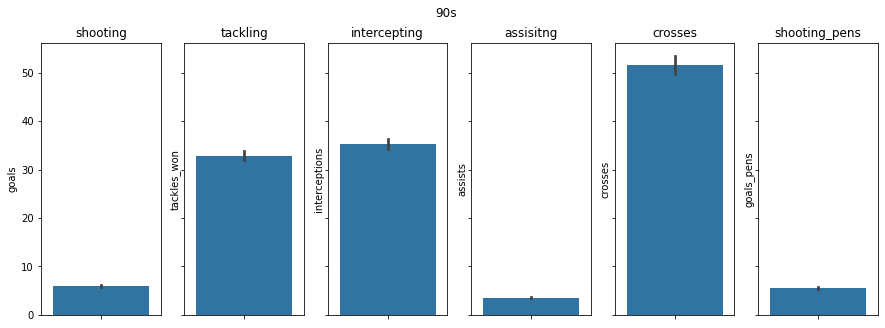

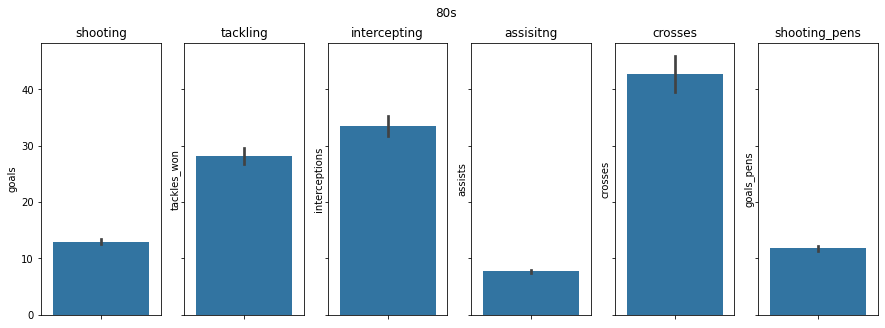

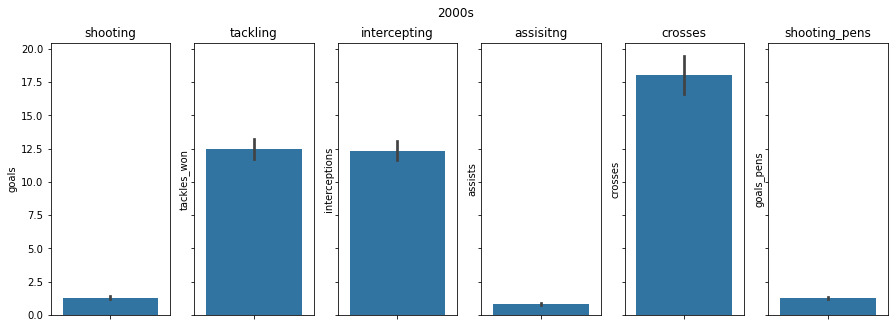

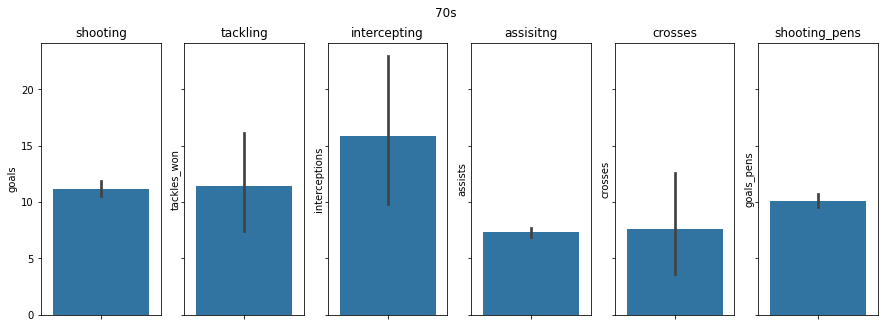

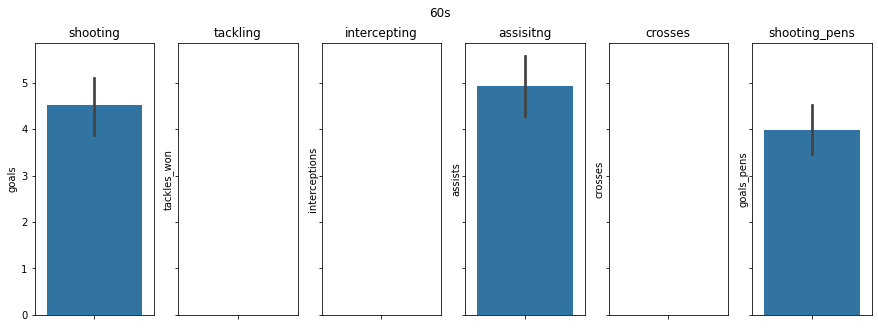

In [65]:
for year in years:
    fig, axes = plt.subplots(1, 6, figsize=(15, 5),sharey=True)
    fig.suptitle(year)


    sns.barplot(ax=axes[0], y=data[data['century'] == year].goals)
    axes[0].set_title('shooting')

    sns.barplot(ax=axes[1], y=data[data['century'] ==  year ].tackles_won)
    axes[1].set_title('tackling')

    sns.barplot(ax=axes[2], y=data[data['century'] == year ].interceptions)
    axes[2].set_title('intercepting')

    sns.barplot(ax=axes[3], y=data[data['century'] == year ].assists)
    axes[3].set_title('assisitng')


    sns.barplot(ax=axes[4], y=data[data['century'] == year ].crosses)
    axes[4].set_title('crosses')
    
    sns.barplot(ax=axes[5], y=data[data['century'] == year].goals_pens)
    axes[5].set_title('shooting_pens')
    plt.savefig(f'{year}.png')


#### in 70s they cared about shooting and assisting
#### in 80s they cared about all skills
#### in 90s they cared about shooting only
#### in 2000s they cared about crossing, intercepting and tackling 

### Q15: does personality affecting skills?!

In [18]:
months=data['month'].value_counts().index

C:\Users\DELL\AppData\Local\Temp/ipykernel_11004/3159253721.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 6, figsize=(15, 5),sharey=True)


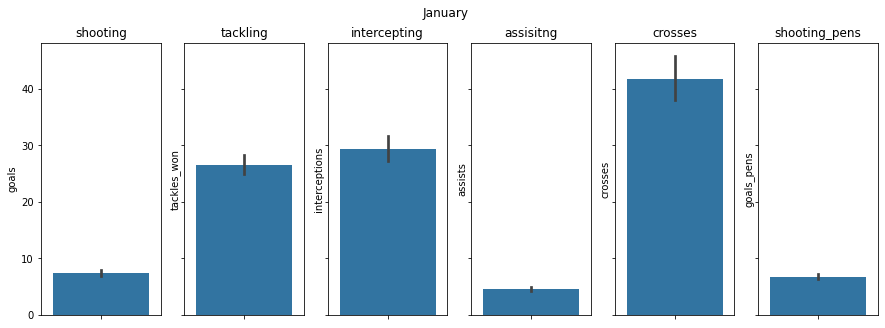

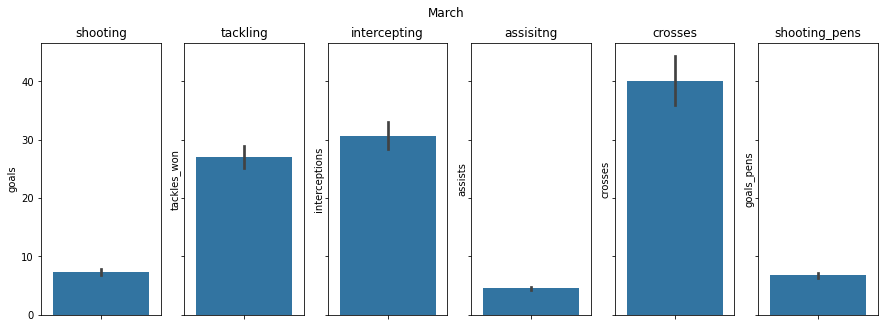

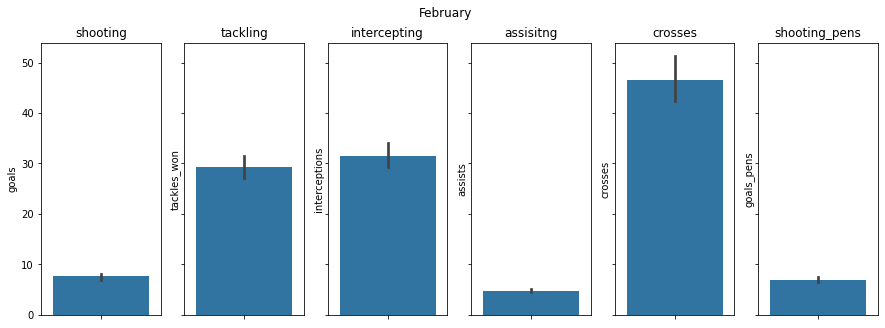

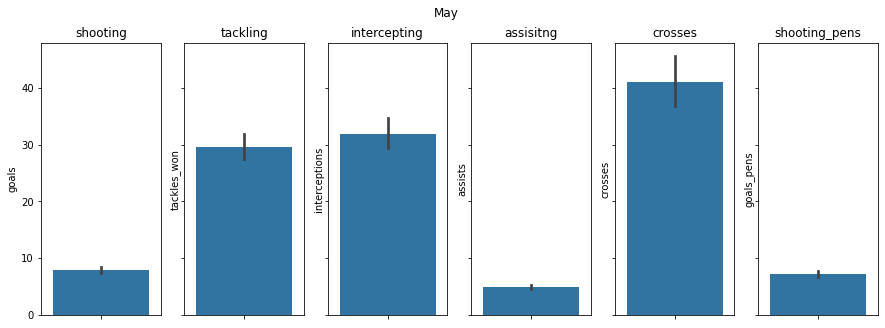

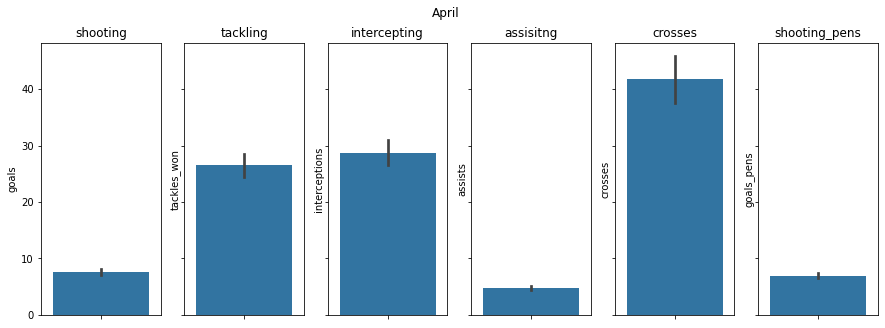

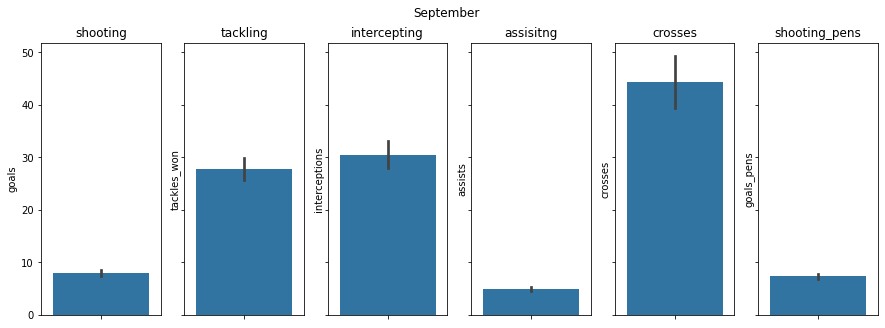

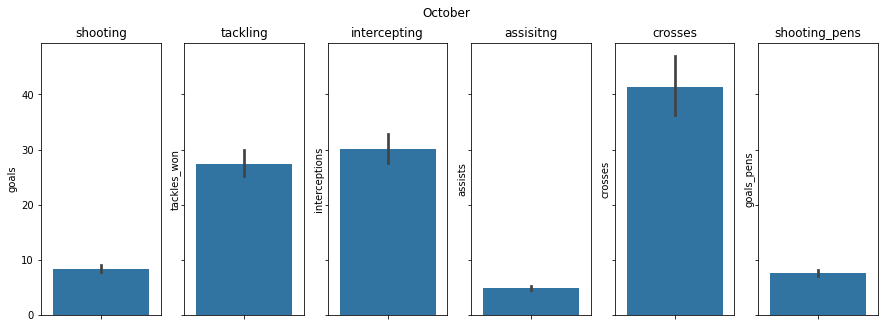

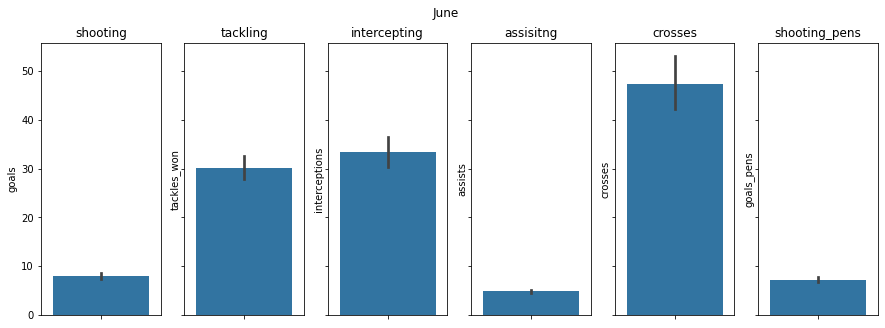

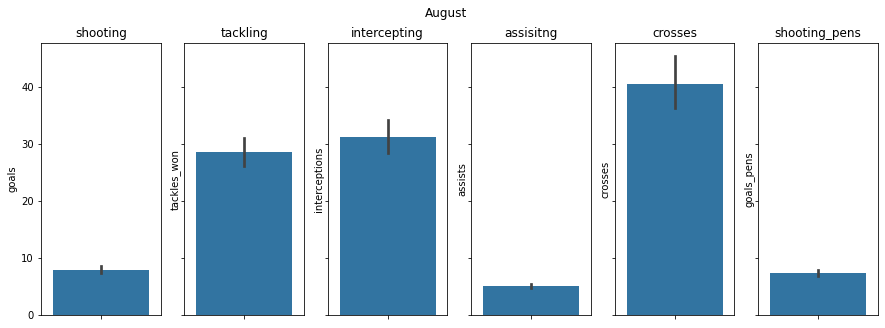

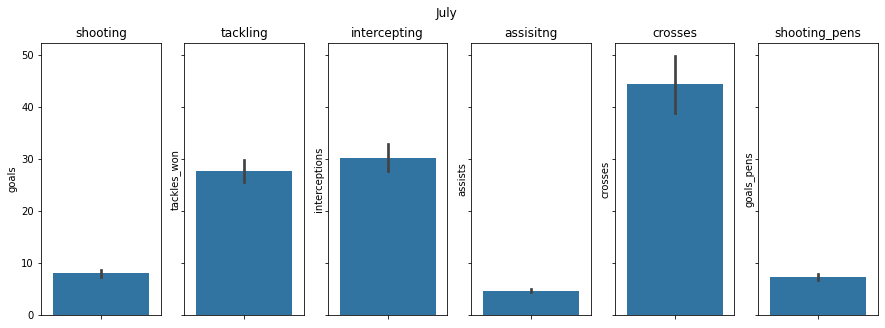

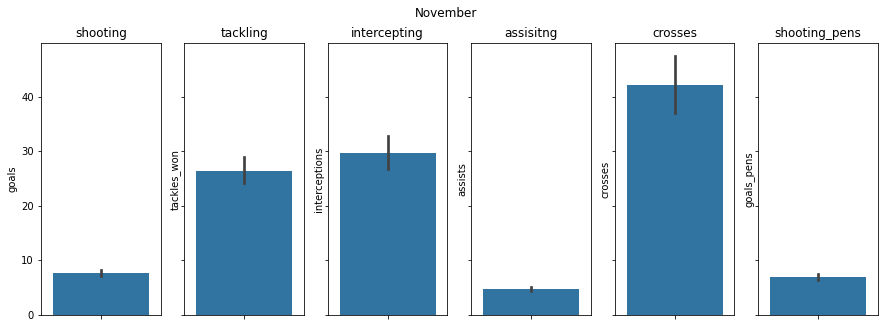

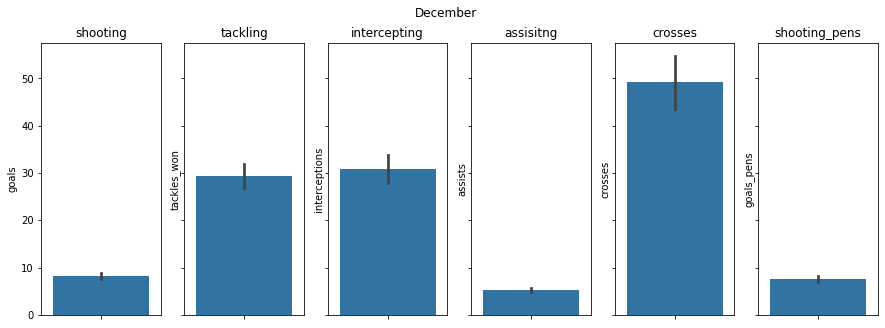

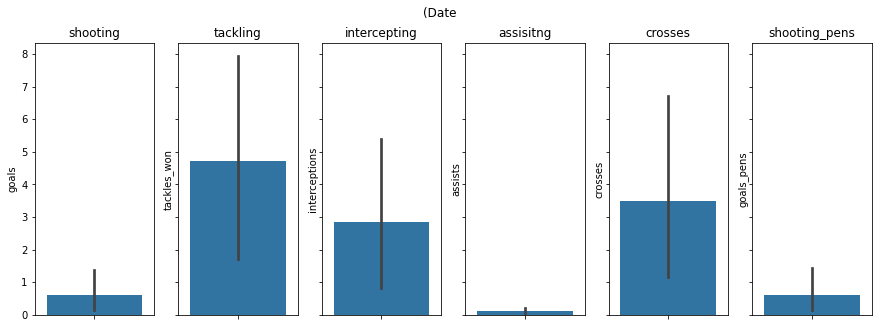

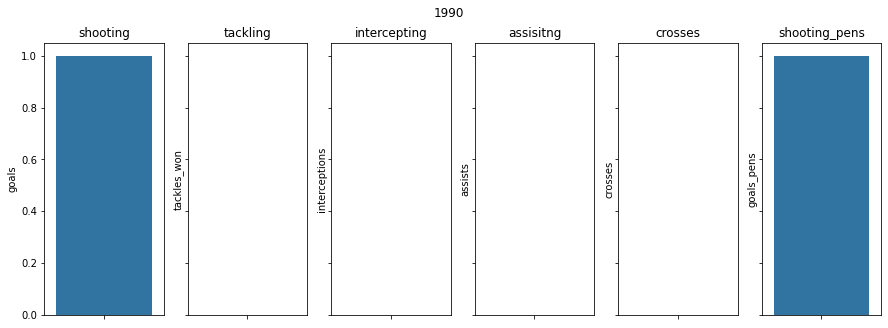

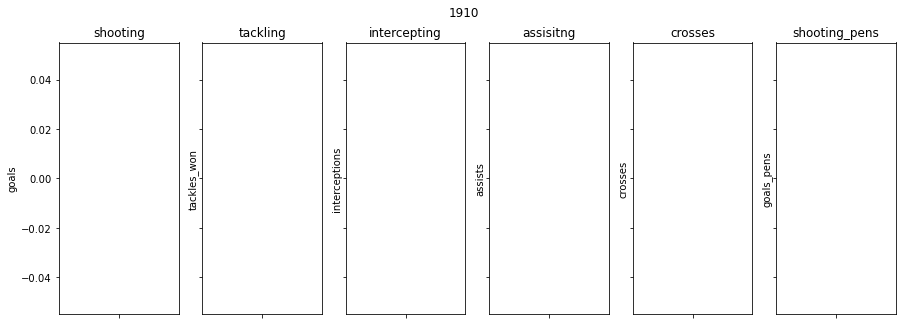

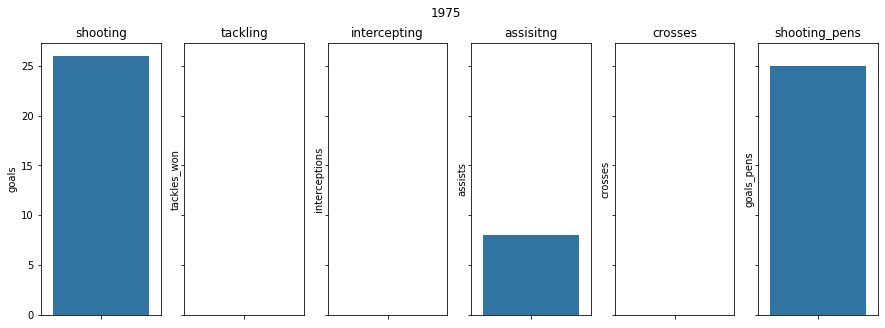

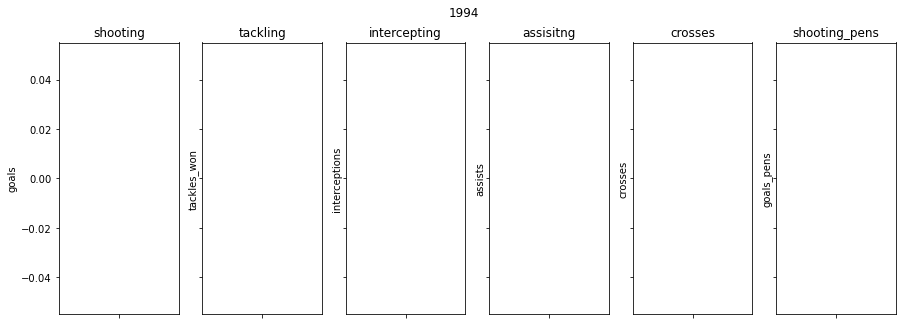

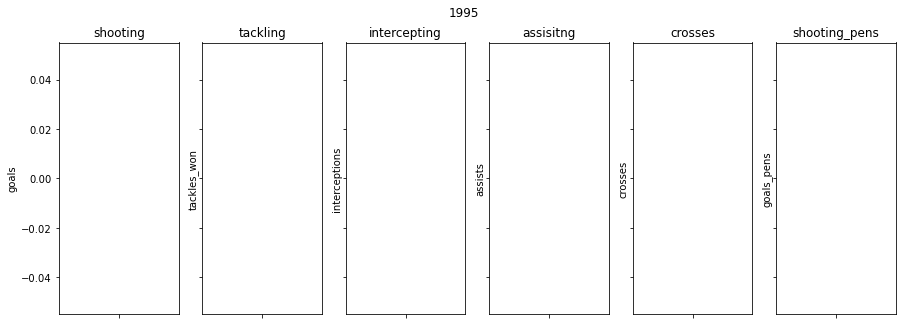

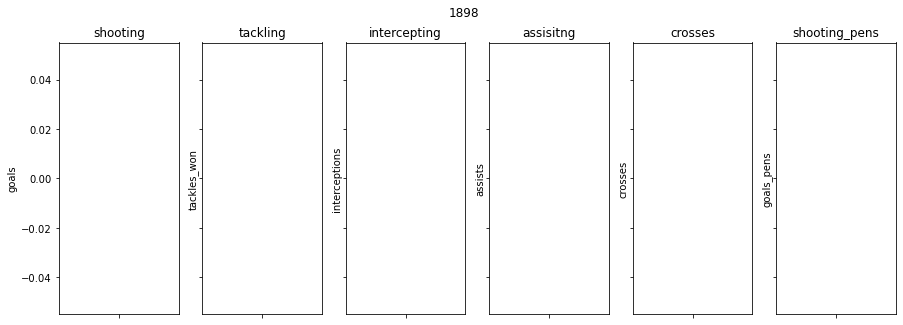

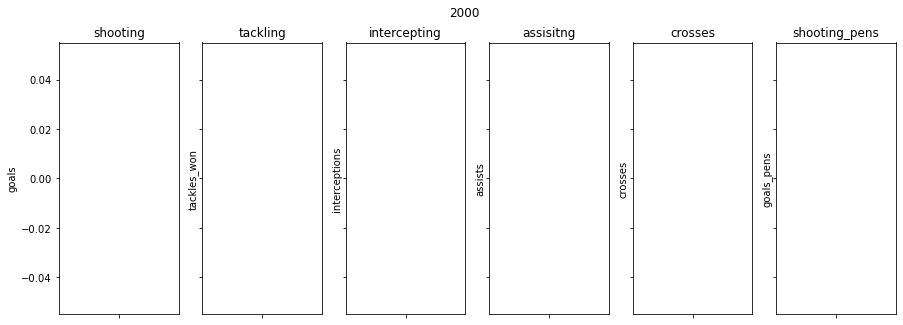

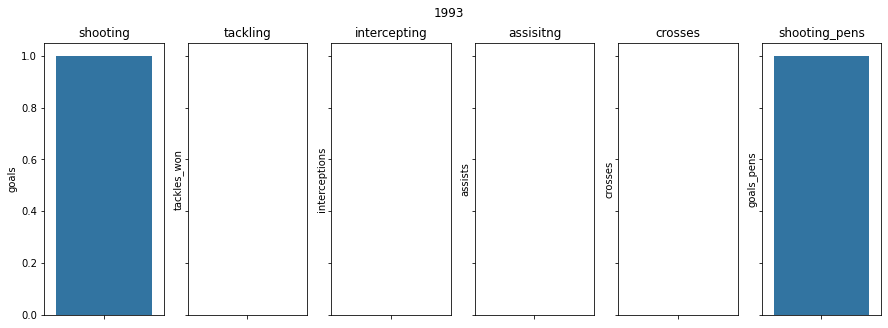

In [19]:
for month in months:
    fig, axes = plt.subplots(1, 6, figsize=(15, 5),sharey=True)
    fig.suptitle(month)


    sns.barplot(ax=axes[0], y=data[data['month'] == month].goals)
    axes[0].set_title('shooting')

    sns.barplot(ax=axes[1], y=data[data['month'] ==  month ].tackles_won)
    axes[1].set_title('tackling')

    sns.barplot(ax=axes[2], y=data[data['month'] == month ].interceptions)
    axes[2].set_title('intercepting')

    sns.barplot(ax=axes[3], y=data[data['month'] == month ].assists)
    axes[3].set_title('assisitng')


    sns.barplot(ax=axes[4], y=data[data['month'] == month ].crosses)
    axes[4].set_title('crosses')
    
    sns.barplot(ax=axes[5], y=data[data['month'] == month].goals_pens)
    axes[5].set_title('shooting_pens')


#### NO